In [33]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

# 1.Global methane levels 
## ex1.1

In [129]:
methane_data=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc",engine="netcdf4")

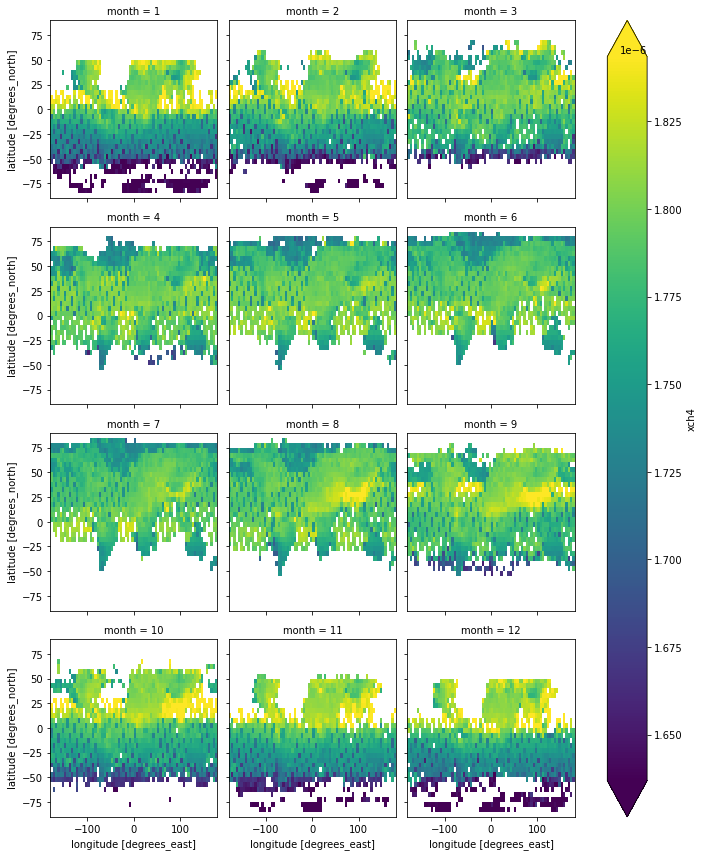

In [141]:
methane_data.xch4.sel(time=slice("2003","2020")).groupby("time.month").mean().plot(col="month",col_wrap=3,robust=True)


## ex1.2


Text(0.5, 1.0, 'Time series for methane')

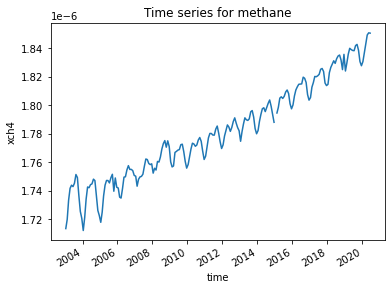

In [17]:
# adding weights factor for the data
weights=np.cos(np.deg2rad(methane_data.lat))
xch4_weighted=methane_data.xch4.weighted(weights)
# plot the 
xch4_weighted.mean(dim=("lat","lon")).sel(time=slice("2003-01","2020-06")).plot()
plt.title("Time series for methane")

 The plot shows the concentration of methane is increasing years by years

## ex1.3

D:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


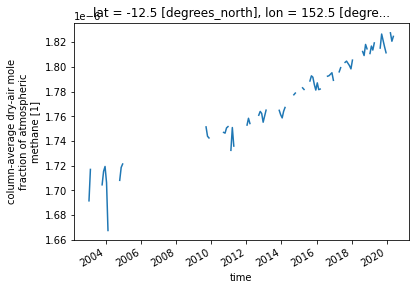

In [28]:

methane_data.xch4.sel(lat=-15,lon=150,method="nearest").plot()

 in this point, methane still increases on the whole, but many missing datas makes the curve incomplete.

#  2. nino 3.4 index

## 2.1 get anomalies


In [113]:
Nino=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")

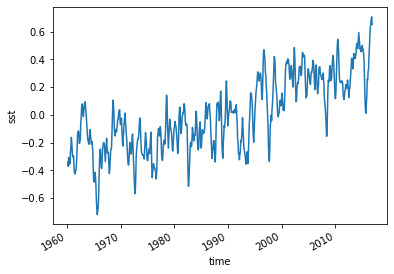

In [179]:
# Group the data by month 
group_data=Nino.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby("time.month")
sst_anom=group_data-group_data.mean(dim="time")
sst_anom_rolling=sst_anom.rolling(time=3,center=True).mean()
# plot anomalies
sst_anom_rolling.mean(dim=["lat","lon"]).plot()

## 2.2 visualize Nino3.4

In [168]:
#Use resample() to get a freqency of 3 months and mean() to get values 

# get the judgement condition for EIni and Lani
Einino=[False for i in range(len(sst_anom))]
Lanino=[False for i in range(len(sst_anom))]
for i in range(4,len(sst_anom)):
    Einino_el=(sst_anom_rolling[i]>0.5)
    Lanino_el=(sst_anom_rolling[i]<-0.5)
    for j in range(4):
        Einino_el=Einino_el and (sst_rolling[i-j]>0.5)
        Lanino_el=Lanino_el and (sst_rolling[i-j]<-0.5)
    Einino[i]=Einino_el
    Lanino[i]=Lanino_el


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

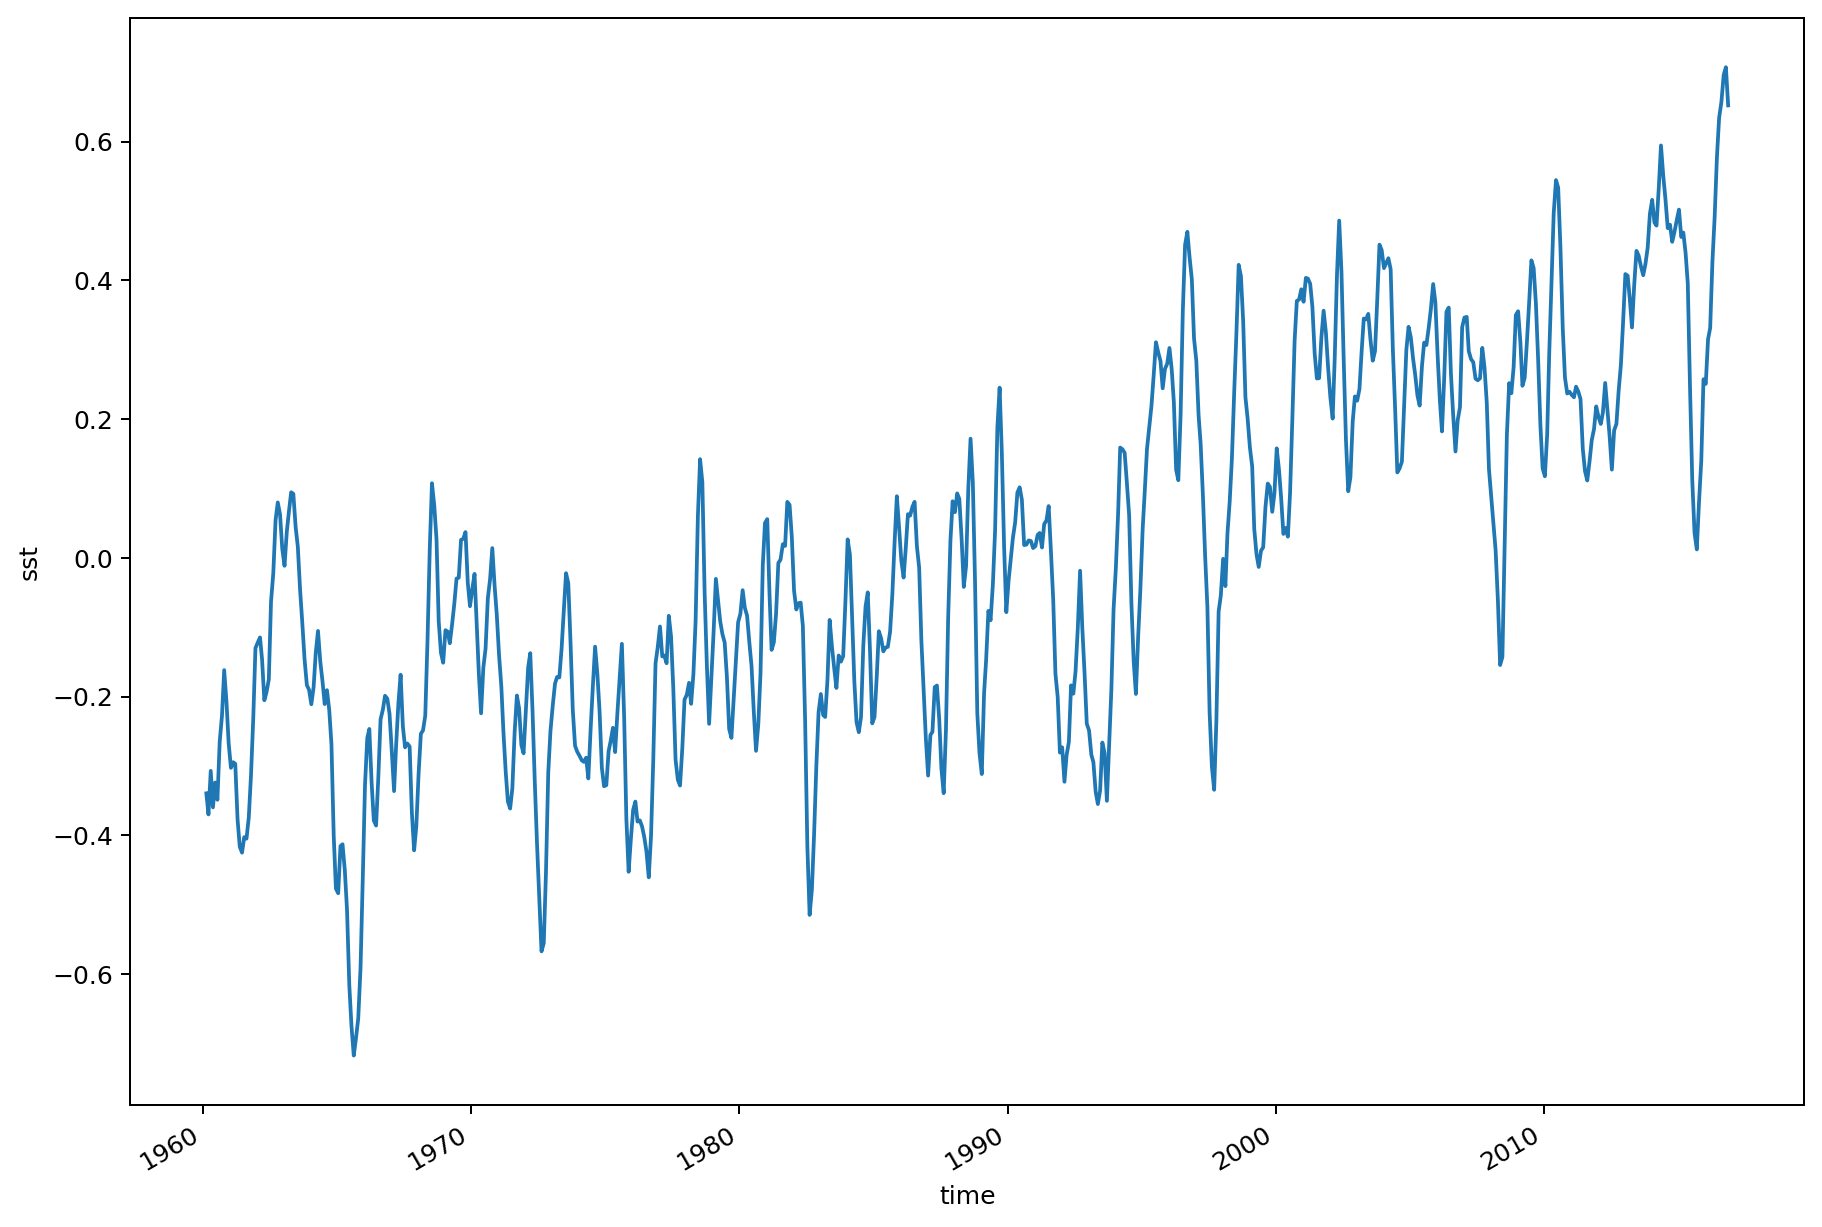

In [191]:
# Then use the 
plt.figure(figsize=(12,8),dpi=180)
sst_anom_rolling.mean(dim=["lat","lon"]).plot()


SyntaxError: positional argument follows keyword argument (1448405214.py, line 1)

In [32]:
# plot averaged global soilw at a specific point
soil_data.sel(lon=114.5,lat=22.5,method="nearest").plot(maker="o",size=10)


D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [ ]:
# show the difference of weight and weighed of the influence of LAT


# Ex3 Explore a netCDF dataset
## 3.1

In [41]:
gpcp=xr.open_dataset("precip.mon.mean.nc",engine="netcdf4")


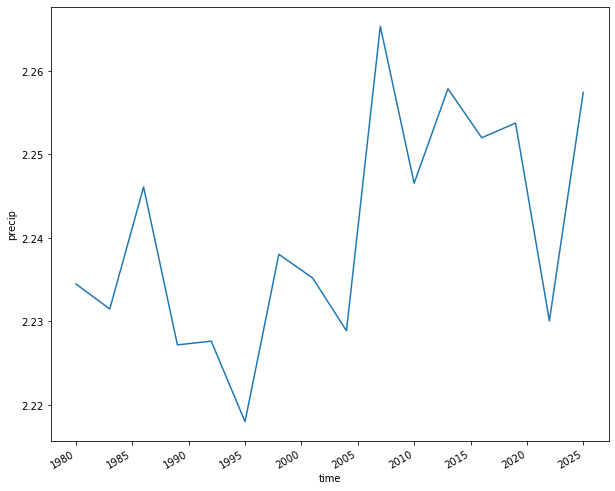

In [37]:

groupData=gpcp.precip.resample(time="3Y")
groupData.mean(dim=["lon","lat","time"]).plot(figsize=(10,8))

## 3.2

D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


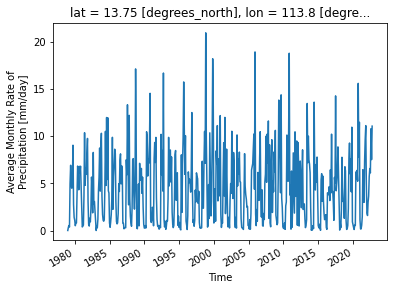

In [40]:
# plot averaged global soilw at a specific point
gpcp.precip.sel(lon=114.5,lat=14,method="nearest").plot()

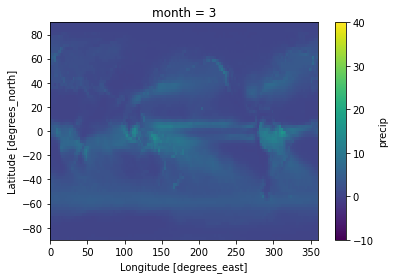

In [46]:
# Plot average global precip at March
precip_clim=gpcp.precip.groupby("time.month").mean()
precip_clim[2,:,:].plot(vmin=-10,vmax=40)

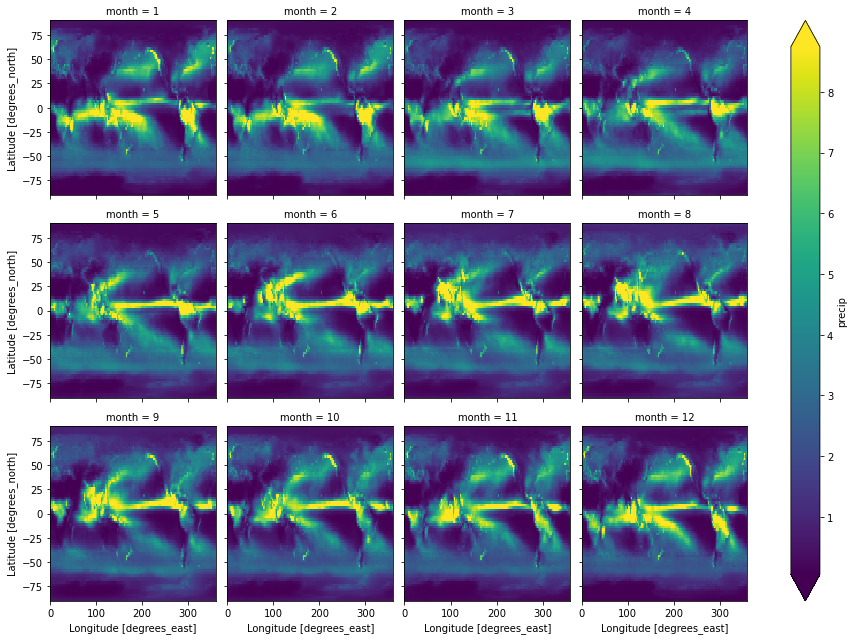

In [47]:
# Plot precip  monthly average in a panel
precip_clim.plot(col="month",col_wrap=4,robust=True)

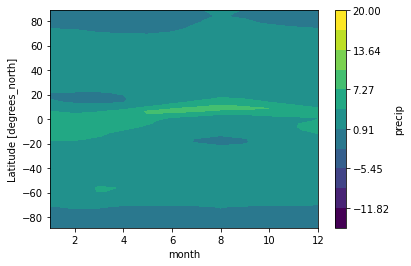

In [52]:
# Plot zonal mean
precip_clim.mean(dim="lon").plot.contourf(x="month",levels=12,vmin=-15,vmax=20)

In [54]:
# Using hv.plot() to show widget 
import hvplot.xarray
gpcp.precip.hvplot(groupby="time", clim=(gpcp.precip.min(), gpcp.precip.max()), cmap='turbo')

:DynamicMap   [time]
   :Image   [lon,lat]   (precip)